In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [13]:
from sklearn.svm import SVC

In [14]:
estimator = GridSearchCV(SVC(), param_grid=params, cv=5, verbose=5)

In [15]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.941 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.965 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.977 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             verbose=5)

In [16]:
estimator.best_estimator_

SVC(C=0.01, kernel='linear')

In [17]:
model = estimator.best_estimator_

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [19]:
y_train_pred = model.predict(X_train)

In [20]:
confusion_matrix(y_train, y_train_pred)

array([[151,   8],
       [  0, 267]])

In [21]:
accuracy_score(y_train, y_train_pred)

0.9812206572769953

In [22]:
f1_score(y_train, y_train_pred)

0.985239852398524

In [23]:
y_test_pred = model.predict(X_test)

In [24]:
confusion_matrix(y_test, y_test_pred)

array([[48,  5],
       [ 1, 89]])

In [25]:
accuracy_score(y_test, y_test_pred)

0.958041958041958

In [26]:
f1_score(y_test, y_test_pred)

0.967391304347826

In [27]:
# Kerneli

In [28]:
num_instances = 1000

In [29]:
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [30]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [31]:
y = f(X[:,0], X[:, 1])

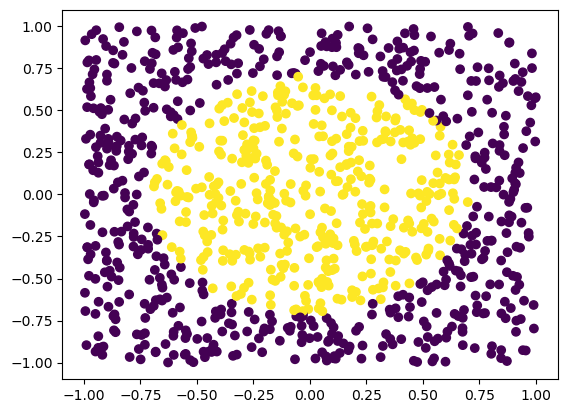

In [32]:
plt.scatter(X[:,0], X[:,1], c=y)

In [33]:
model = SVC(kernel='linear')

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [35]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [36]:
y_train_pred = model.predict(X_train)

In [37]:
y_test_pred = model.predict(X_test)

In [38]:
accuracy_score(y_train, y_train_pred)

0.5946666666666667

In [39]:
accuracy_score(y_test, y_test_pred)

0.596

In [40]:
model = SVC(kernel='rbf')

In [41]:
model.fit(X_train, y_train)

SVC()

In [42]:
y_train_pred = model.predict(X_train)

In [43]:
accuracy_score(y_train, y_train_pred)

0.988

In [44]:
y_test_pred = model.predict(X_test)

In [45]:
accuracy_score(y_test, y_test_pred)

0.976

In [47]:
# BROJ POTPORNIH VEKTORA:
model.n_support_

array([80, 79], dtype=int32)

In [48]:
# INDEKSI INSTANCI KOJI SU POTPORNI VEKTORI
model.support_

array([ 16,  17,  26,  27,  28,  45,  50,  67,  71,  76,  79, 110, 112,
       116, 141, 162, 168, 169, 170, 191, 195, 216, 248, 277, 281, 295,
       303, 317, 328, 352, 353, 360, 361, 374, 376, 382, 390, 393, 401,
       413, 416, 425, 431, 440, 450, 458, 467, 471, 486, 509, 527, 537,
       540, 543, 552, 556, 559, 560, 562, 573, 575, 587, 588, 595, 606,
       631, 635, 637, 640, 650, 658, 663, 670, 693, 700, 703, 714, 716,
       721, 734,   4,  12,  13,  18,  25,  43,  48,  80,  81,  85,  88,
        90, 117, 119, 131, 132, 135, 144, 157, 163, 176, 189, 202, 204,
       205, 225, 235, 236, 254, 261, 267, 269, 271, 272, 283, 300, 302,
       325, 332, 333, 336, 337, 339, 341, 345, 350, 354, 355, 356, 367,
       369, 385, 427, 436, 446, 451, 459, 474, 488, 502, 523, 533, 558,
       567, 603, 616, 621, 622, 634, 657, 659, 683, 690, 695, 701, 706,
       725, 728, 729], dtype=int32)

In [49]:
# SAMI POTPORNI VEKTORI
model.support_vectors_

array([[ 9.33873600e-02, -7.64979437e-01],
       [ 7.06648678e-01,  3.45678636e-01],
       [ 7.27409986e-01,  8.93064437e-02],
       [-9.82718671e-02, -7.94172279e-01],
       [ 4.88308414e-01, -5.32592105e-01],
       [-5.29501881e-01,  5.00033278e-01],
       [-3.45752078e-01, -6.50476082e-01],
       [-7.66289696e-01, -1.17867404e-04],
       [ 7.22302494e-01, -1.30495135e-01],
       [ 7.59856090e-01,  1.89407016e-01],
       [-3.22964828e-01,  7.19657362e-01],
       [ 4.99276321e-01, -5.22497377e-01],
       [ 1.63005170e-02, -7.83142012e-01],
       [ 6.91184020e-01,  2.94035358e-01],
       [-7.81000897e-01, -6.15717683e-02],
       [-2.52332838e-01,  7.22434589e-01],
       [ 7.72590715e-01,  2.19688454e-01],
       [-6.02385938e-01,  4.72097012e-01],
       [-4.13050532e-01,  6.53240746e-01],
       [-6.74902494e-01, -2.69246303e-01],
       [ 1.01895955e-01,  7.62378130e-01],
       [-6.13055844e-01, -4.75431546e-01],
       [-7.12475988e-02,  7.23163019e-01],
       [-1.

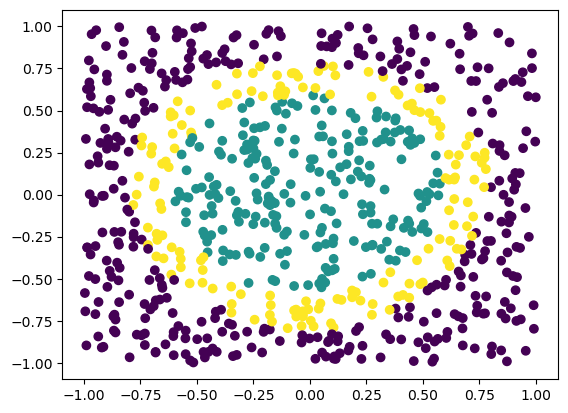

In [50]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()